<a href="https://colab.research.google.com/github/wndnjs2037/2021W_Python-/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC(%EB%82%98)_20220221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 2015.csv 2019.csv 파일 사용(아파트 분양가)
# 2015~19 데이터 전처리 하기
# groupby, pivot_table 데이터 집계하기
# pandas로 시각화하기
# seaborn 으로 시각화 하기
# 2013~2015 데이터 전처리 하기
# melt 사용해서 데이터 녹이기
# 연도, 월을 분리하는 함수 만들기
# concat 2013-2015/2015-2019 데이터 합치기

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')#나눔고딕 폰트 설정

In [ ]:
df_first = pd.read_csv('./2015.csv', encoding='cp949')
df_first.head(5)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [ ]:
df_last = pd.read_csv('./2019.csv', encoding='cp949')
df_last

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN


In [ ]:
# 데이터 요약하기
df_last.info() #데이터프레임에 대한 정보 요약됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [ ]:
### 결측치 확인하기 (결측치 - 다룰 수 없는 형태)
df_last.isnull() #데이터프레임에 null 값들이 있는지 체크
#-> 데이터 표를 한번에 확인할 수 없음.

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4330,False,False,False,False,False
4331,False,False,False,False,True
4332,False,False,False,False,False
4333,False,False,False,False,True


In [ ]:
df_last.isnull().sum() #분양가격에 277개의 null 데이터가 있음을 알 수 있다.

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [ ]:
### 오브젝트로 되어있는 타입을 수치 데이터로 보기 위해 변환하기
### 데이터 타입 변환하기
# 분양 가격 (오브젝트) -> 수치 데이터
# pd.to_numeric() 사용

# 분양가격으로 이름을 줄여서 새로운 컬럼 추가
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce') #타입을 바꾸고 싶은 데이터시리즈를 인자로 넣어준다.
df_last['분양가격'] #데이터 타입이 float으로 변경된 것을 확인할 수 있다.
# errors -> 에러가 났을 경우, 어떻게 할 것인지에 대한 옵션, coerce로 설정하면 NaN 데이터로 채워준다.

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격, Length: 4335, dtype: float64

In [ ]:
### 분양가격을 평당분양가격으로 변경하기
df_last['평당분야가격']=df_last['분양가격'] * 3.3
df_last['평당분야가격']

0       19275.3
1       18651.6
2       19410.6
3       18879.3
4       19400.7
         ...   
4330    12810.6
4331        NaN
4332    12863.4
4333        NaN
4334    11883.3
Name: 평당분야가격, Length: 4335, dtype: float64

In [ ]:
### 규모구분이란?
df_last['규모구분'].unique() #유니크한 값을 추출해서 어떤 값들로 이루어져있는지 확인할 수 있다.

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [ ]:
# 위의 유니크 값에서 알 수 있는 점
# 1. 전용면적 이라는 단어가 불필요하다
# 2. 범위가 반복이 됨, 초과 -> ~로 대체 가능, 이하 -> 생략 가능

In [ ]:
### replace
df_last['전용면적'] = df_last['규모구분'].replace('전용면적', '') #replace -> 왼쪽 인자의 문자를 찾아서 오른쪽 인자의 값으로 변경해주는 역할
df_last['전용면적'] #안바뀜!!
# replace는 데이터가 모두 일치해야 변경된다.
# str을 넣어주면 해결됨

0                      전체
1              전용면적 60㎡이하
2        전용면적 60㎡초과 85㎡이하
3       전용면적 85㎡초과 102㎡이하
4             전용면적 102㎡초과
              ...        
4330                   전체
4331           전용면적 60㎡이하
4332     전용면적 60㎡초과 85㎡이하
4333    전용면적 85㎡초과 102㎡이하
4334          전용면적 102㎡초과
Name: 전용면적, Length: 4335, dtype: object

In [ ]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '') #str 사용
df_last['전용면적']

0                  전체
1               60㎡이하
2         60㎡초과 85㎡이하
3        85㎡초과 102㎡이하
4              102㎡초과
            ...      
4330               전체
4331            60㎡이하
4332      60㎡초과 85㎡이하
4333     85㎡초과 102㎡이하
4334           102㎡초과
Name: 전용면적, Length: 4335, dtype: object

In [ ]:
df_last['전용면적'] = df_last['전용면적'].str.replace('초과', '~')
df_last['전용면적']

0                 전체
1              60㎡이하
2         60㎡~ 85㎡이하
3        85㎡~ 102㎡이하
4              102㎡~
            ...     
4330              전체
4331           60㎡이하
4332      60㎡~ 85㎡이하
4333     85㎡~ 102㎡이하
4334           102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [ ]:
df_last['전용면적'] = df_last['전용면적'].str.replace('이하', '')
df_last['전용면적'] 

0               전체
1              60㎡
2         60㎡~ 85㎡
3        85㎡~ 102㎡
4            102㎡~
           ...    
4330            전체
4331           60㎡
4332      60㎡~ 85㎡
4333     85㎡~ 102㎡
4334         102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [ ]:
df_last['전용면적'] = df_last['전용면적'].str.replace(' ', '') #공백제거
df_last['전용면적'] 

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [ ]:
# 데이터의 앞 뒤 공백을 전부 없애주는 작업
df_last['전용면적'] = df_last['전용면적'].str.strip() #공백을 제거하는 함수
df_last['전용면적']

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [ ]:
# 필요없는 컬럼 지우기
df_last.info() #데이터 확인 -> 규모구분, 분양가격(m^2), 분양가격 삭제할거임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분야가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


In [ ]:
# drop을 이용해서 컬럼 지우기
df_last = df_last.drop(['규모구분', '분양가격(㎡)', '분양가격'], axis=1)  #axis로 drop할 행(0), 열(1) 설정

In [ ]:
df_last.info() #사용중인 메모리 줄이기 가능 memeory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   평당분야가격  3957 non-null   float64
 4   전용면적    4335 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 169.5+ KB


In [ ]:
# groupby로 집계하기
# 1. 지역명으로 분양가격의 평균 구하기
df_last.groupby(['지역명'])['평당분야가격'].mean() # 집계한다 -> 지역명을 통한 값을 조회한다

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분야가격, dtype: float64

In [ ]:
# 2. 전용 면적으로 분양가격의 평균(mean) 구하기
df_last.groupby(['전용면적'])['평당분야가격'].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분야가격, dtype: float64

In [ ]:
# 3. 지역명, 전용면적으로 분양가격의 평균 구하기
df_last.groupby(['전용면적','지역명'])['평당분야가격'].mean()

전용면적   지역명
102㎡~  강원      8311.380000
       경기     14771.790000
       경남     10358.363265
       경북      9157.302000
       광주     11041.532432
                  ...     
전체     전남      7283.562000
       전북      7292.604000
       제주     10784.994000
       충남      7815.324000
       충북      7219.014000
Name: 평당분야가격, Length: 85, dtype: float64

In [ ]:
# unstack으로 2개의 인덱스로 되어있는 데이터프레임을 index와 컬럼으로 나누기
df_last.groupby(['지역명','전용면적'])['평당분야가격'].mean().unstack()

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.380000,7567.098000,7485.588000,8749.557143,7477.536000
경기,14771.790000,13251.744000,12523.566000,13677.774000,12559.602000
경남,10358.363265,8689.175000,8618.676000,10017.612000,8658.672000
경북,9157.302000,7883.172000,8061.372000,8773.814634,8078.532000
광주,11041.532432,9430.666667,9910.692000,9296.100000,9903.630000
대구,13087.338000,11992.068000,11778.690000,11140.642857,11771.298000
대전,14876.871429,9176.475000,9711.372000,9037.430769,9786.018000
부산,13208.250000,11353.782000,11864.820000,12072.588000,11936.166000
서울,23446.038000,23212.794000,22786.830000,25943.874000,22610.346000


In [ ]:
# round를 사용해서 소숫점 버리기
df_last.groupby(['지역명','전용면적'])['평당분야가격'].mean().unstack().round(1)

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.4,7567.1,7485.6,8749.6,7477.5
경기,14771.8,13251.7,12523.6,13677.8,12559.6
경남,10358.4,8689.2,8618.7,10017.6,8658.7
경북,9157.3,7883.2,8061.4,8773.8,8078.5
광주,11041.5,9430.7,9910.7,9296.1,9903.6
대구,13087.3,11992.1,11778.7,11140.6,11771.3
대전,14876.9,9176.5,9711.4,9037.4,9786.0
부산,13208.2,11353.8,11864.8,12072.6,11936.2
서울,23446.0,23212.8,22786.8,25943.9,22610.3


In [ ]:
# 4. 연도, 지역명으로 평당분양가격의 평균 구하기
g = df_last.groupby(['연도','지역명'])['평당분야가격'].mean()

In [ ]:
g.loc[2019] #2019년의 평당분양가격 확인가능

지역명
강원     8934.475000
경기    15665.540000
경남    10697.615789
경북     9050.250000
광주    12111.675000
대구    14081.650000
대전    12619.200000
부산    13537.865000
서울    28286.830000
세종    11299.394118
울산    10216.250000
인천    13249.775000
전남     8219.275862
전북     8532.260000
제주    11828.469231
충남     8748.840000
충북     7970.875000
Name: 평당분야가격, dtype: float64

In [ ]:
g.unstack().transpose() #인덱스와 컬럼을 바꿔준다

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000


In [ ]:
### pivot table -> 그룹바이와 같은 역할
# 1. 지역명으로 분양가격의 평균 구하기
pd.pivot_table(df_last, index=['지역명'], values=['평당분야가격'], aggfunc='mean') #인덱스 -> 지역명, 컬럼 ->평당분양가격으로 설정되어 평균값을 확인할 수 있다.

,평당분야가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [ ]:
# 2. 전용 면적으로 분양가격의 평균(mean) 구하기
pd.pivot_table(df_last, index=['전용면적'], values=['평당분야가격'], aggfunc='mean') 

,평당분야가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [ ]:
# 3. 지역명, 전용면적으로 분양가격의 평균 구하기
pd.pivot_table(df_last, index=['지역명'], columns = '전용면적', values=['평당분야가격'], aggfunc='mean')  #피벗테이블은 컬럼을 정해줄 수 있다.

평당분야가격                                                        
전용면적         102㎡~           60㎡       60㎡~85㎡      85㎡~102㎡            전체
지역명                                                                       
강원     8311.380000   7567.098000   7485.588000   8749.557143   7477.536000
경기    14771.790000  13251.744000  12523.566000  13677.774000  12559.602000
경남    10358.363265   8689.175000   8618.676000  10017.612000   8658.672000
경북     9157.302000   7883.172000   8061.372000   8773.814634   8078.532000
광주    11041.532432   9430.666667   9910.692000   9296.100000   9903.630000
대구    13087.338000  11992.068000  11778.690000  11140.642857  11771.298000
대전    14876.871429   9176.475000   9711.372000   9037.430769   9786.018000
부산    13208.250000  11353.782000  11864.820000  12072.588000  11936.166000
서울    23446.038000  23212.794000  22786.830000  25943.874000  22610.346000
세종    10106.976000   9323.927027   9775.458000   9847.926000   9805.422000
울산     9974.448000   9202.106897  10502.531707   8861.007692  10492.712195
인천    14362.030435  11241.318000  11384.406000  11527.560000  11257.026000
전남     8168.490000   7210.170000   7269.240000   7908.862500   7283.562000
전북     8193.570000   7609.932000   7271.352000   8275.781250   7292.604000
제주    10522.787234  14022.221053  10621.314000  10709.082353  10784.994000
충남     8689.169388   7911.156000   7818.954000   9120.045000   7815.324000
충북     8195.352000   7103.118000   7264.488000   8391.306000   7219.014000

In [ ]:
# 4. 연도, 지역명으로 평당분양가격의 평균 구하기
pd.pivot_table(df_last, index=['연도','지역명'], values=['평당분야가격'], aggfunc='mean') #리스트를 사용해 두개의 값을 적는 방법으로도 가능

평당분야가격
연도   지역명              
2015 강원    7188.060000
     경기   11060.940000
     경남    8459.220000
     경북    7464.160000
     광주    7916.700000
...                ...
2019 전남    8219.275862
     전북    8532.260000
     제주   11828.469231
     충남    8748.840000
     충북    7970.875000

[85 rows x 1 columns]

In [ ]:
# 전처리와 집계 완~~~

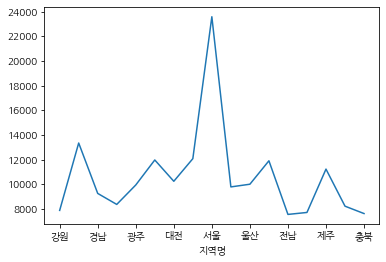

In [ ]:
### 데이터 시각화 matplotlib
g = df_last.groupby(['지역명'])['평당분야가격'].mean()
g.plot()

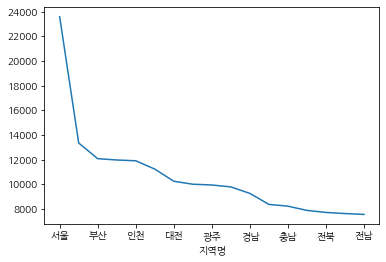

In [ ]:
### 정렬해서 데이터 보기
g = df_last.groupby(['지역명'])['평당분야가격'].mean().sort_values(ascending=False)
g.plot()

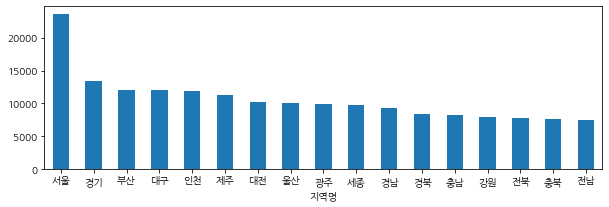

In [ ]:
# 막대그래프로 시각화하기
g.plot.bar(rot=0, figsize=(10,3)) #rot는 라벨의 이름 위치 각도

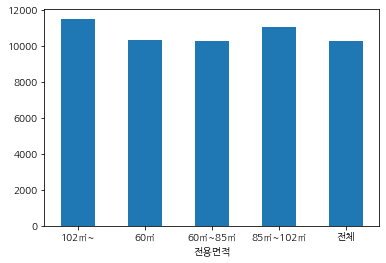

In [ ]:
# 전용 면적당 평당분양가격의 평규
g = df_last.groupby(['전용면적'])['평당분야가격'].mean()
g.plot.bar(rot=0)

In [ ]:
### Seabron 이라는 라이브러리로 시각화 하기
import seaborn as sns

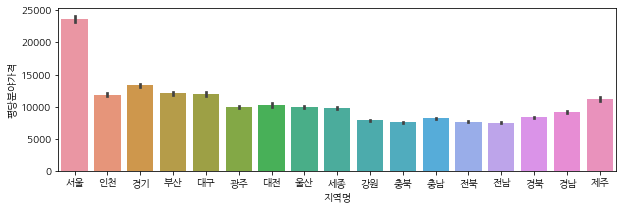

In [ ]:
# barplot 지역별 평당분양가격 그래프 그리기
plt.figure(figsize=(10,3)) #r그래프 크기
sns.barplot(data=df_last, x='지역명', y='평당분야가격')
# 중앙의 검은색 막대기는 표준편차 -> ci=None  옵션을 주면 없애기 가능

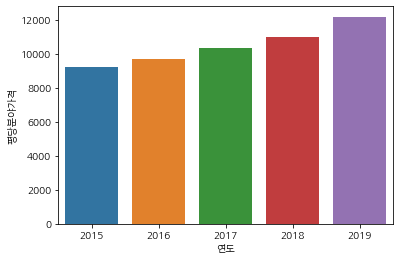

In [ ]:
# barplot으로 연도별 평당분양가격 그려보기
sns.barplot(data=df_last, x='연도', y='평당분야가격', ci=None)

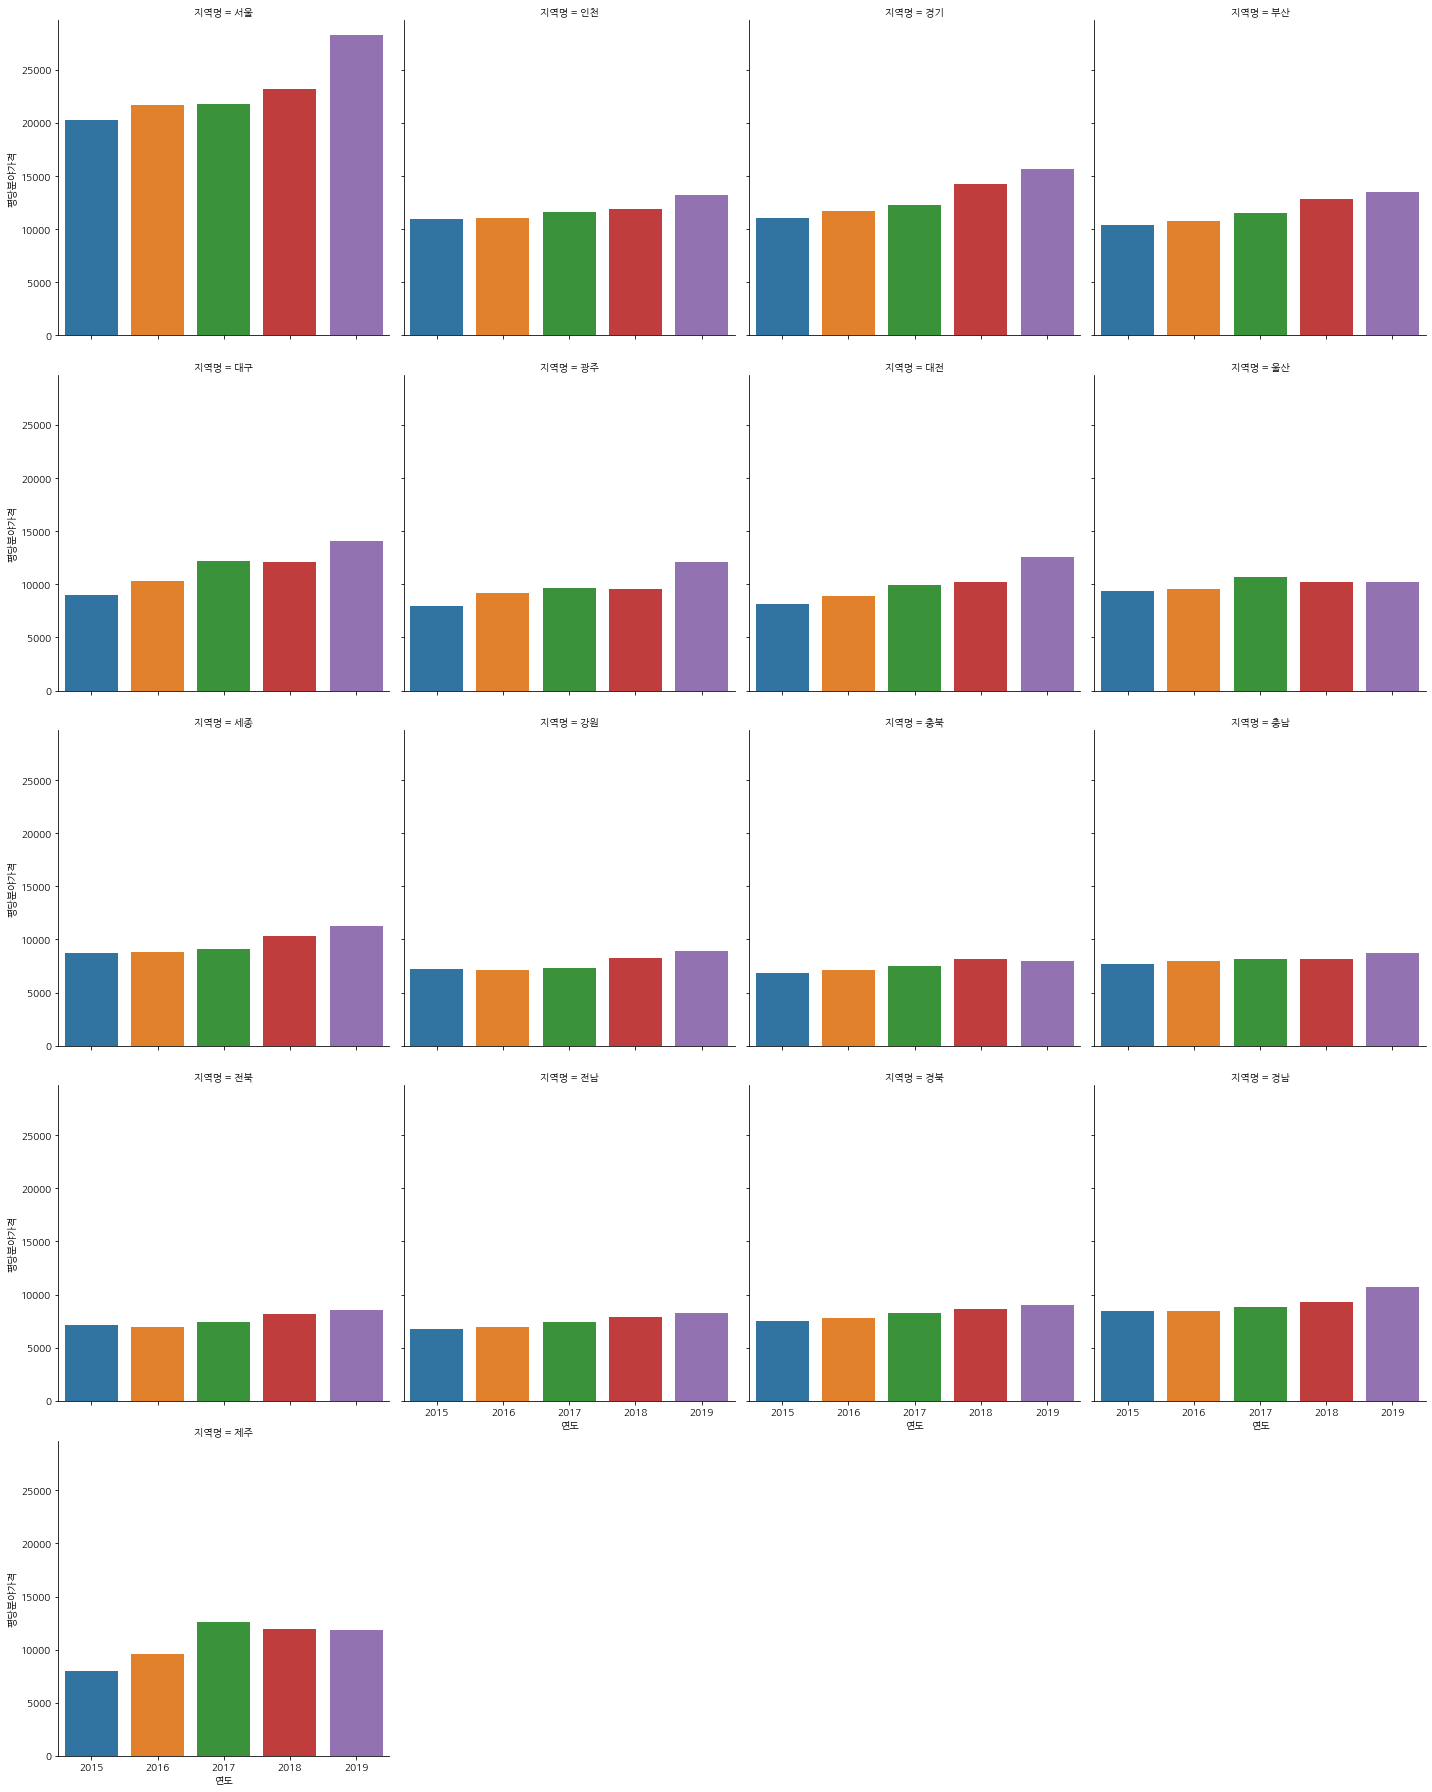

In [ ]:
sns.catplot(data=df_last, x='연도', y='평당분야가격', kind='bar', col='지역명', col_wrap=4, ci=None)
#여러가지의 그래프가 한번에 나타남

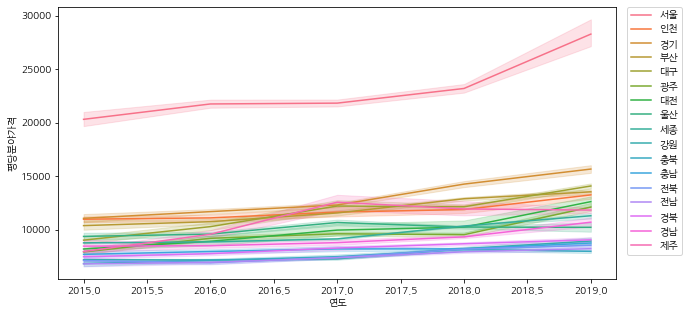

In [ ]:
# lineplot으로 연도별 평당분양가격 그려보기
plt.figure(figsize=(10,5))
sns.lineplot(data=df_last, x='연도', y='평당분야가격', hue='지역명')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)

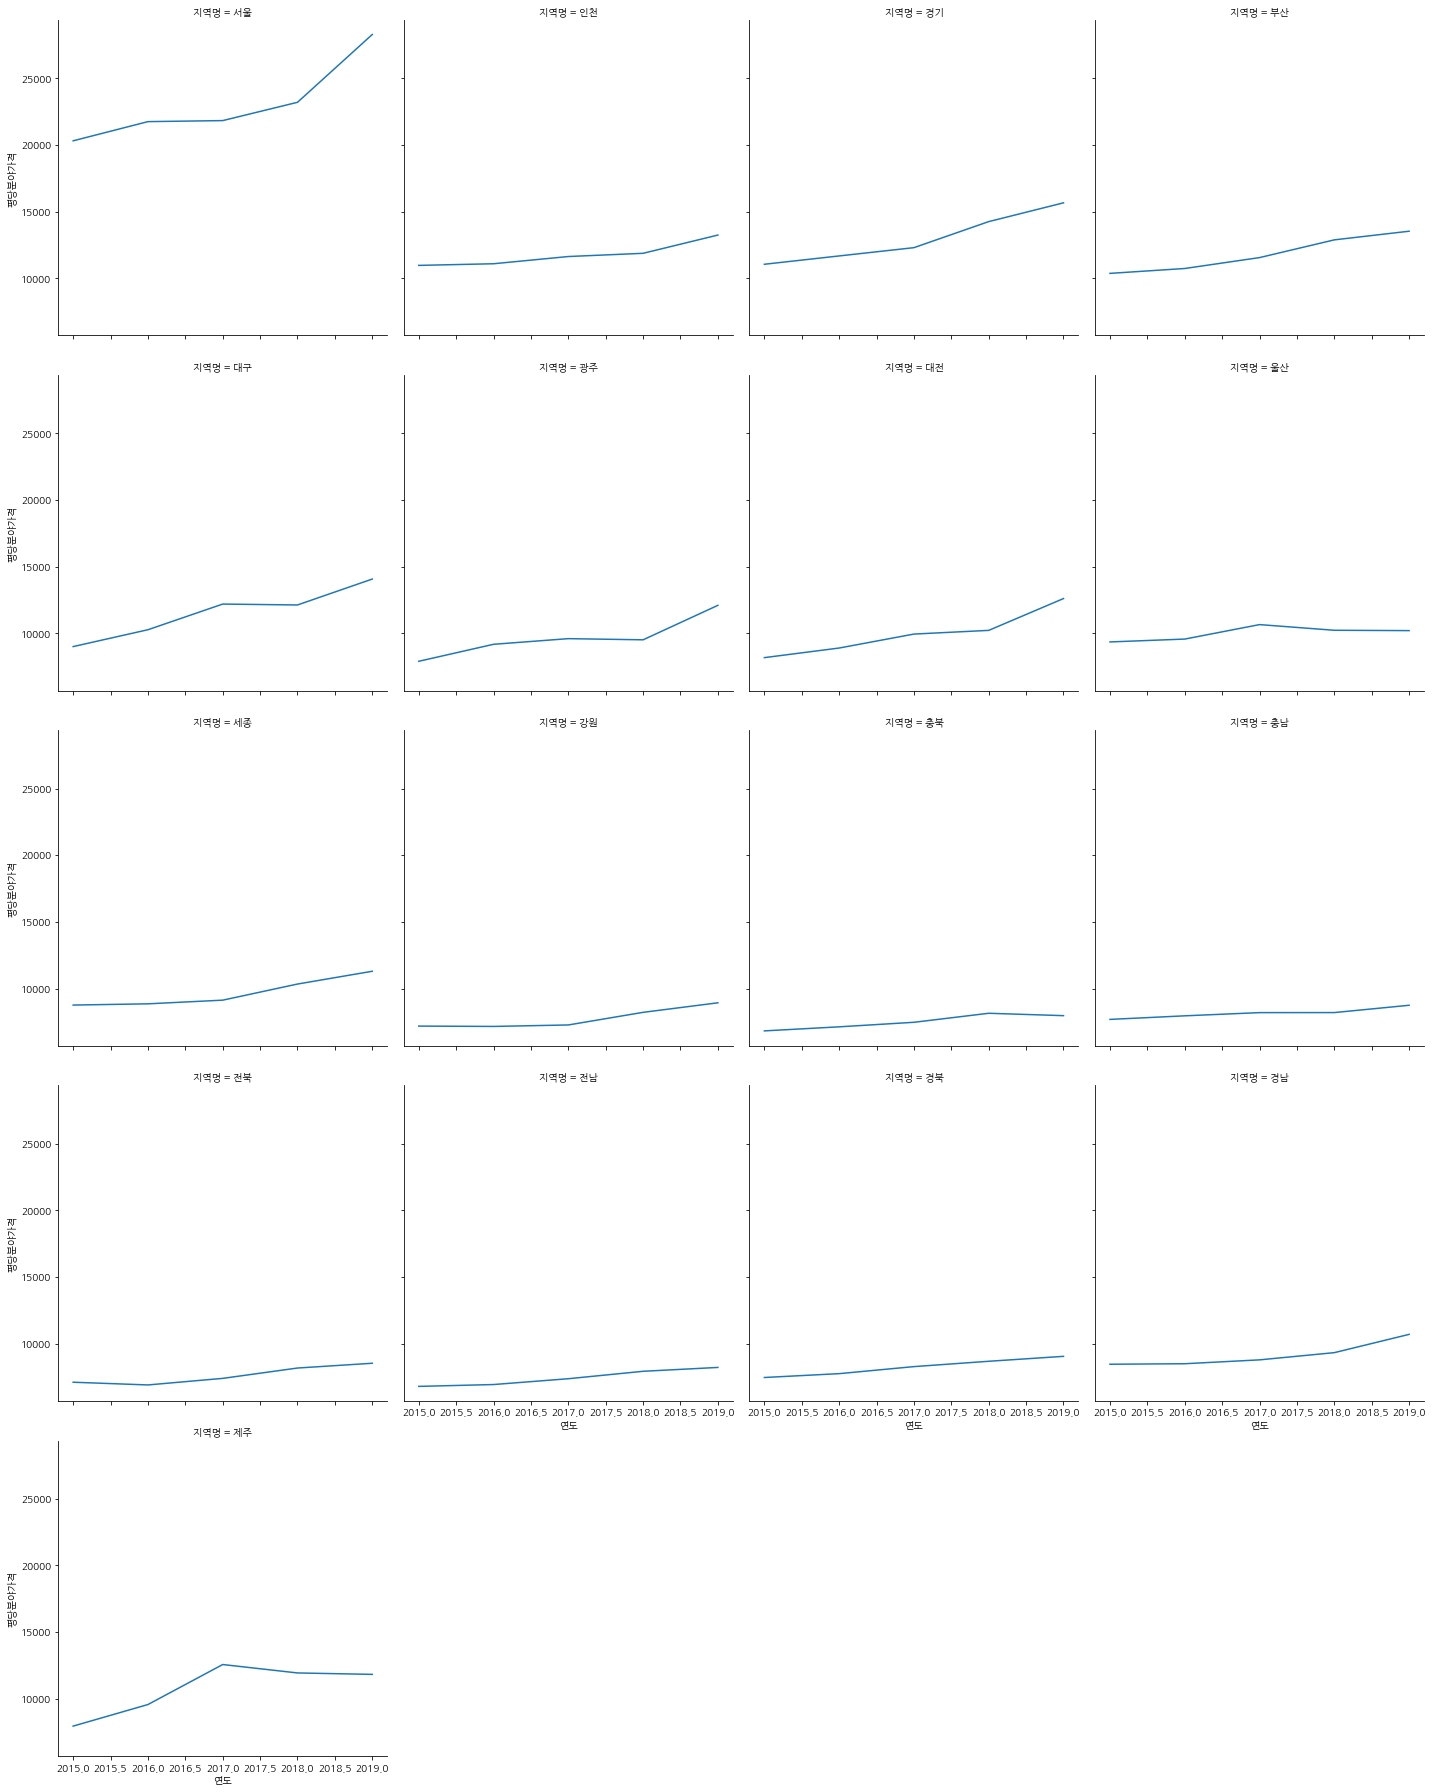

In [ ]:
# rㅣplot
# hue 값을 한 그래프에 나타내는 것이 아닌, 다른 그래프를 생성해서 나타낸다
sns.relplot(data=df_last, x='연도', y='평당분야가격', kind='line', col='지역명', col_wrap=4, ci=None)

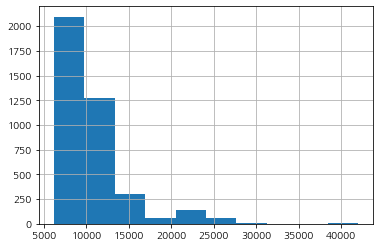

In [ ]:
### 수치데이터 히스토그램보내기
# 히스토그램이란? 수치형 데이터 분포를 정확하게 표현해주는 그래프이다.
# 하나의 숫자 변수만 입력해야한다.

h = df_last['평당분야가격'].hist(bins=10) #bins -> 쪼개는 값, 10을 입력하면 10개의 값으로 변수를 쪼개줌

In [ ]:
# 씨본에 있는거 사용
# distplot 으로 히스토그램 그리기
# 단 , distplot은 결측치가 있으면 에러가 난다.
price = df_last.loc[df_last['평당분야가격'].notnull(), '평당분야가격'] #결측치를 제거해서 넣어줌
price

0       19275.3
1       18651.6
2       19410.6
3       18879.3
4       19400.7
         ...   
4327    10114.5
4328    10715.1
4330    12810.6
4332    12863.4
4334    11883.3
Name: 평당분야가격, Length: 3957, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


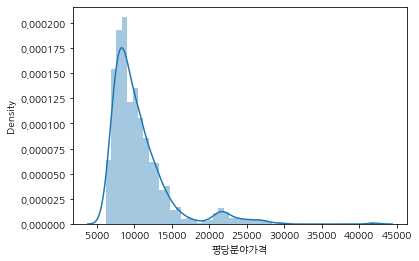

In [ ]:
sns.distplot(price) #막대그래프와 선 같이 나옴

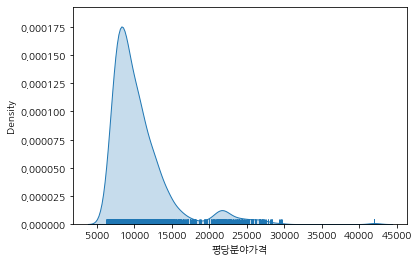

In [ ]:
# kde, rug
# density를 사용해서 부드럽게 막대기를 이어준다.
# kde(kernel density) -> 함수를 겹치는 방법으로 히스토그램보다 부드러운 분포 곡선을 그린다.
# rug(실수 분포 플롯) -> 자료의 분포를 묘사하기 위해 사용 (1개 이상의 값이 있으면 표시한다. 최소 1개라도 중요한 정보라면 활용 가능)
sns.kdeplot(price, shade=True)
sns.rugplot(price)

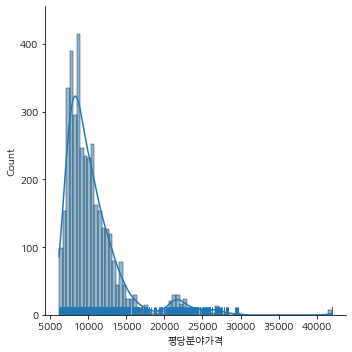

In [ ]:
# distplot 대신 displot 사용 권장됨
sns.displot(price, kde=True, rug=True)

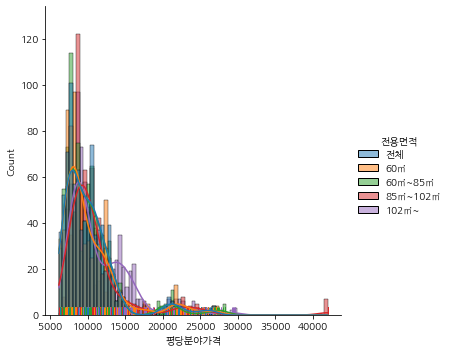

In [ ]:
sns.displot(data=df_last, x='평당분야가격', kde=True, rug=True, hue='전용면적')

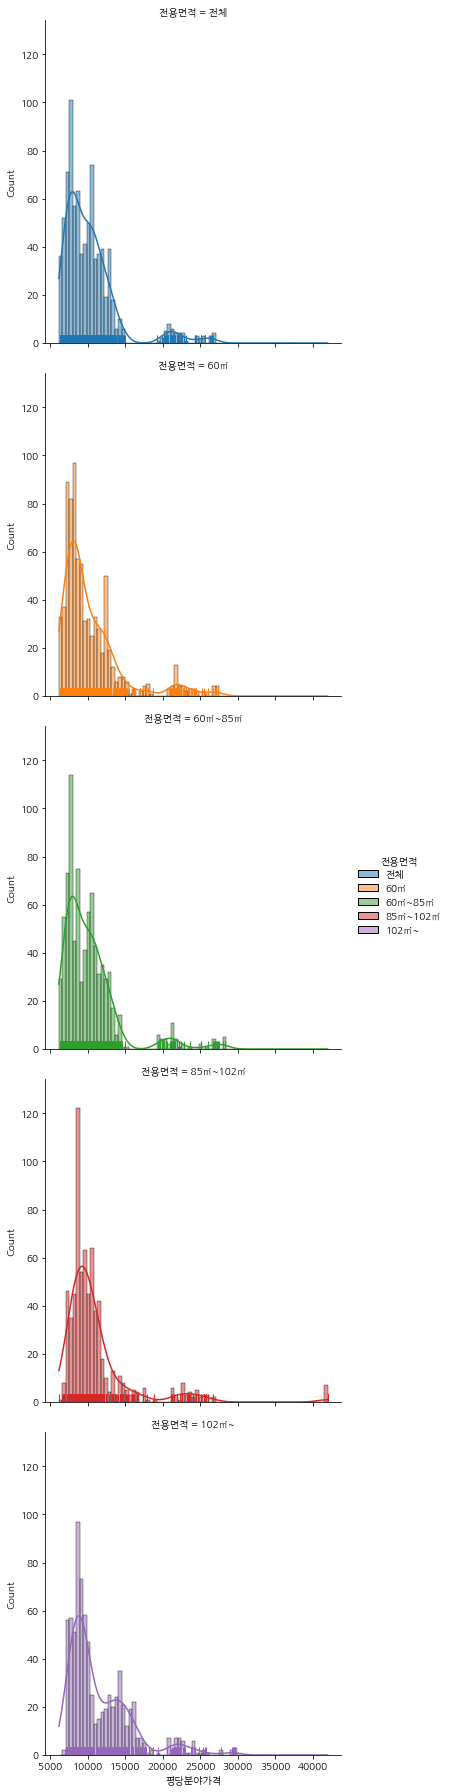

In [ ]:
sns.displot(data=df_last, x='평당분야가격', kde=True, rug=True, hue='전용면적', col='전용면적', col_wrap=1) #col 사용시, hue로 겹쳐져있던 부분들이 따로 그려짐

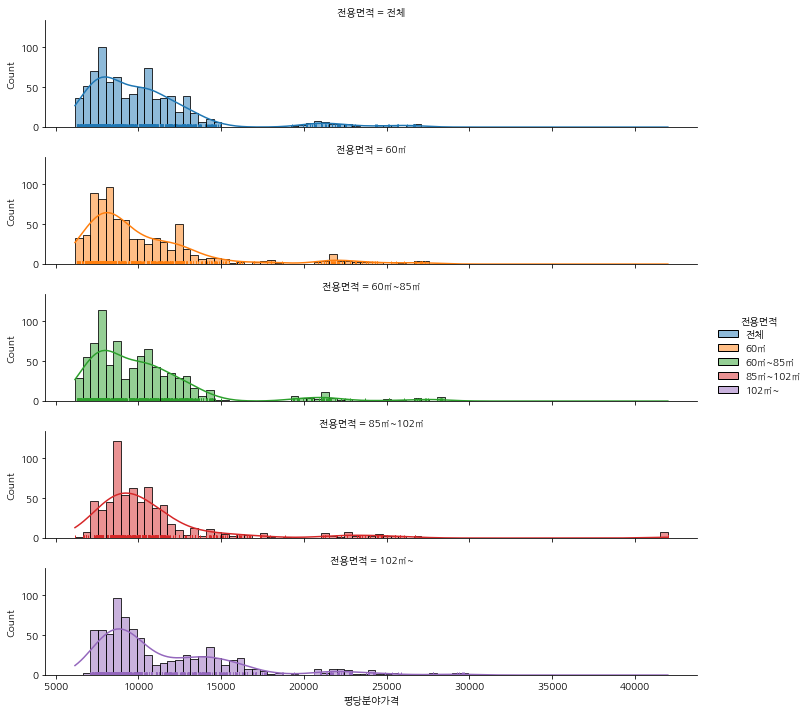

In [ ]:
# 한눈에 보기 쉽게 수정하기
sns.displot(data=df_last, x='평당분야가격', kde=True, rug=True, hue='전용면적', col='전용면적', col_wrap=1, aspect=5, height=2) # 표기되는 비율 aspect * height

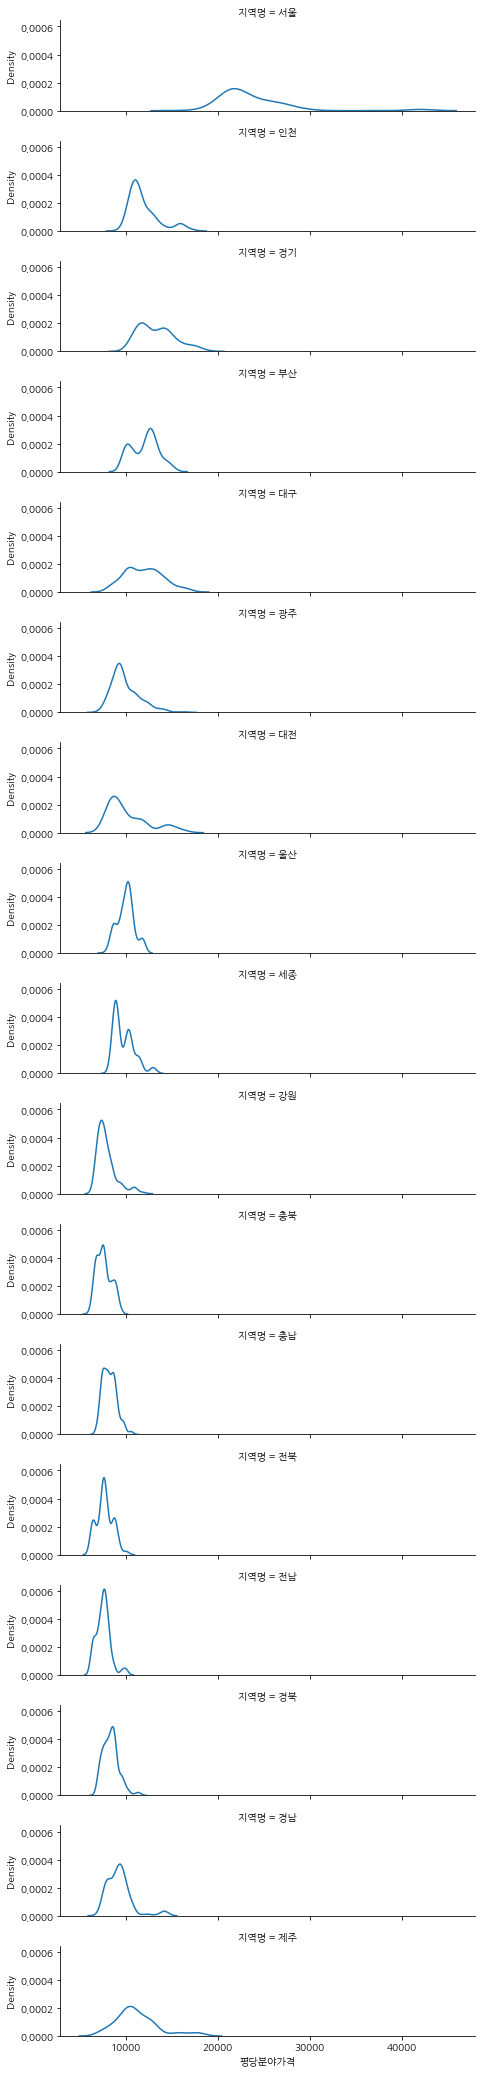

In [ ]:
# subplot으로 여러개 그려보기
g = sns.FacetGrid(df_last, row='지역명', height=1.7, aspect=4) #지역명 기준으로 그리드 그래프 생성
g.map(sns.kdeplot, '평당분야가격')

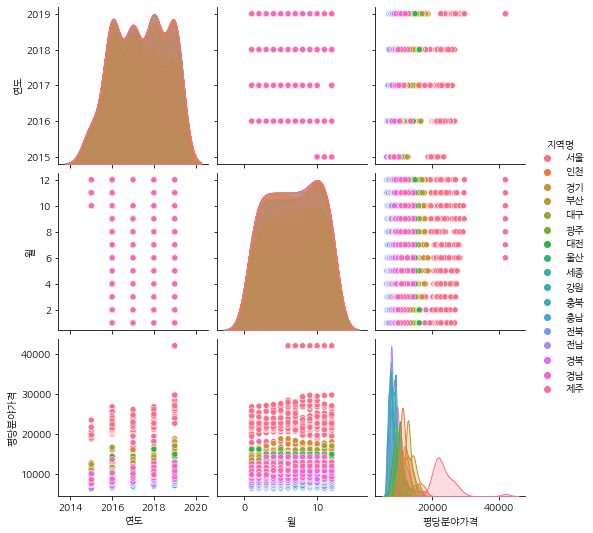

In [ ]:
# pairplot
# notnull로 결측치가 없는 데이터 생성
df_last_notnull = df_last.loc[df_last['평당분야가격'].notnull(), ['연도', '월', '평당분야가격', '지역명', '전용면적']]
sns.pairplot(df_last_notnull, hue='지역명')

In [ ]:
# 2013-2015 데이터 전처리하기
df_first.head(5)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [ ]:
# 결측치 확인
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [ ]:
### melt로 데이터 만들기 녹이기
# melt를 이용해서 데이터의 형태를 변경할 수 있다.
# df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과 다름
# 같은 형태로 만들어주어야 데이터를 합칠 수 있다

# melt는 id 변수를 기준으로 원래 데이터프레임에 있던 
# 여러개의 컬럼을 variable에 길게 쌓고, 
# value 컬럼에 id 컬럼과 variable에 해당하는 값을 넣어주는 식으로 데이터를 재구조화한다.

df_first.melt(id_vars='지역')

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [ ]:
df_first_melt = df_first.melt(id_vars='지역', var_name='기간', value_name='평당분야가격')
df_first_melt

,지역,기간,평당분야가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [ ]:
df_last

,지역명,연도,월,평당분야가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
4330,제주,2019,12,12810.6,전체
4331,제주,2019,12,NaN,60㎡
4332,제주,2019,12,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,85㎡~102㎡


In [ ]:
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,8493,8627,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,10501,10397,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,8527,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [ ]:
### 데이터를 연도와 월로 분리하기
# 만들고 싶은 기능 : 기간을 연도와 월로 분리하는 기능
# 기간이 뭐고, 연도가 뭐고, 월이 뭔지를 정확히 알아야 한다.
# data = 2013년 12월 -> 2013. 12

def parse_year(date):
  year = date.split('년')[0]
  return int(year) #원래 리스트의 요소로 반환되는 값을 int형으로 형변환



def parse_month(date):
  month = date.split('년')[1].replace('월','') #월 문자 버리기
  #print(month)
  return int(month)


In [ ]:
df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)
df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)
df_first_melt
#melt로 데이터 만듦!

,지역,기간,평당분야가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


여기부터 20220222 실습

In [ ]:
# sample을 이용해서 데이터 미리보기
df_last.sample() # 랜덤한 값이 아무거나 한 행 샘플로 나온다

,지역명,연도,월,평당분야가격,전용면적
2517,충북,2018,3,8104.8,60㎡~85㎡


In [ ]:
df_last.columns.to_list() # 컬럼이 리스트 형태로 반환된다.

['지역명', '연도', '월', '평당분야가격', '전용면적']

In [ ]:
cols = ['지역명','연도','월','평당분야가격']

In [ ]:
# 컬럼명 바꾸기
df_fisrt_melt = df_first_melt.rename? # 물음표를 치고 실행하면 도움말이 나온다.

In [ ]:
df_fisrt_melt = df_first_melt.rename(columns={"평당분야가격" : "평당분양가격"}) # 컬럼명 수정하기

In [ ]:
df_last_prepare = df_last.loc[df_last['전용면적'] == '전체', cols].copy()
df_last_prepare

,지역명,연도,월,평당분야가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [ ]:
# df_first_melt에서 (Df_last_prepare) 공통된 컬럼을 가져온 뒤
df_first_prepare = df_first_melt[cols].copy()
df_first_prepare

,지역,연도,월,평당분야가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098
...,...,...,...,...
352,전북,2015,8,6580
353,전남,2015,8,6289
354,경북,2015,8,7037
355,경남,2015,8,7665


In [ ]:
# concat을 이용하여 데이터프레임 합치기
df = pd.concat([df_first_prepare, df_last_prepare]) #합치고싶은 데이터프레임을 인자로 넣어준다.
df #2013 ~ 2019 데이터가 한번에 나옴

,지역,연도,월,평당분야가격,지역명
0,서울,2013,12,18189.0,NaN
1,부산,2013,12,8111.0,NaN
2,대구,2013,12,8080.0,NaN
3,인천,2013,12,10204.0,NaN
4,광주,2013,12,6098.0,NaN
...,...,...,...,...,...
4310,NaN,2019,12,8144.4,전북
4315,NaN,2019,12,8091.6,전남
4320,NaN,2019,12,9616.2,경북
4325,NaN,2019,12,10107.9,경남


In [ ]:
# 결측치 확인하기
df['연도'].value_counts(sort=False) #연도 열의 데이터 개수 확인하기

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

In [ ]:
# pivot_table을 사용하여 데이터를 전처리
t = pd.pivot_table(df, index='연도', columns='지역명', values='평당분야가격').round() #인덱스, 컬럼, 값을 지정해서 새로 만들 수 있음
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7160.0,10377.0,7586.0,7171.0,8052.0,9232.0,8098.0,10307.0,19725.0,8750.0,10053.0,10484.0,6317.0,6703.0,7405.0,7115.0,6645.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


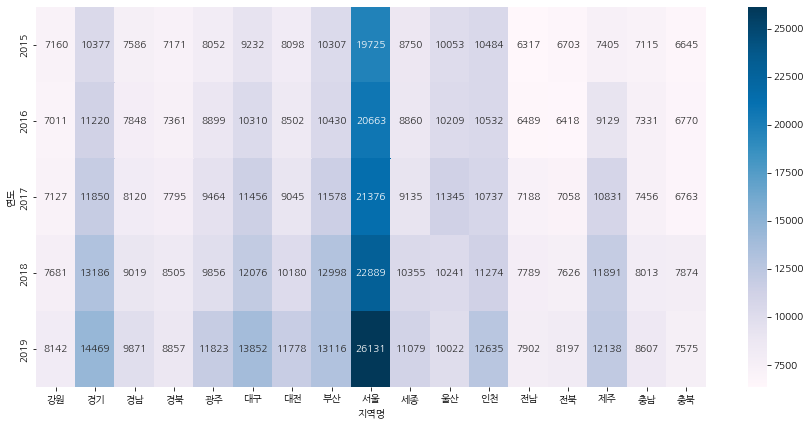

In [ ]:
# 히트맵으로 표현해보기
# 두 개의 카테고리 값에 대한 값 변화를 한 눈에 알기 쉽다
plt.figure(figsize=(15,7))
sns.heatmap(t, cmap='PuBu', annot=True, fmt='.0f') #cmap : 색 설정
# 색이 진할수록 값이 많이 몰려있음

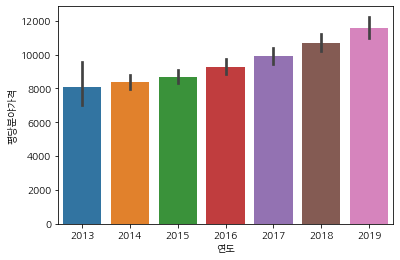

In [ ]:
### 2013년부터 최근 데이터까지 시각화하기
sns.barplot(data=df, x='연도', y='평당분야가격')

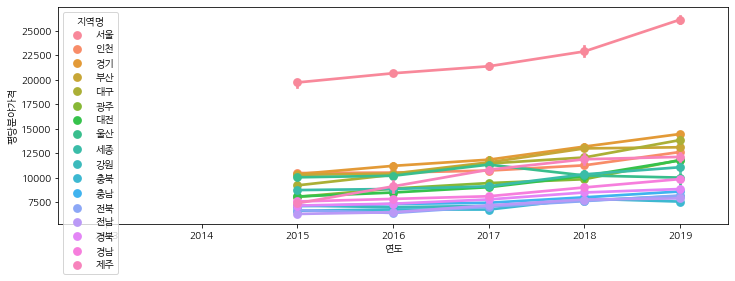

In [ ]:
# pointplot
plt.figure(figsize=(12,4))
sns.pointplot(data=df, x='연도', y='평당분야가격', hue='지역명')

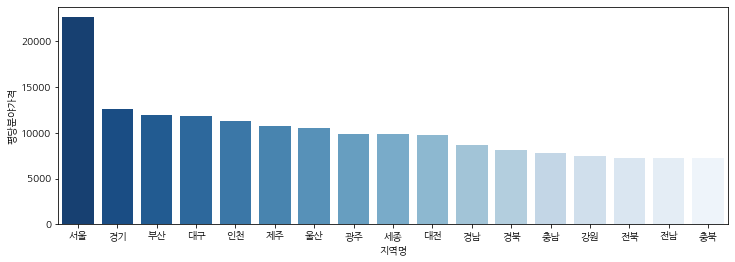

In [ ]:
# 평당 분양가격 높은 순서대로 그리기
plt.figure(figsize=(12,4))
mean_price = df.pivot_table(index='지역명', values='평당분야가격').sort_values(by='평당분야가격', ascending=False)
sns.barplot(data=mean_price, x=mean_price.index, y='평당분야가격', palette='Blues_r')